In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Generating Data

In [2]:
X,Y = make_blobs?

In [6]:
X,Y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=10)
print(X.shape,Y.shape)

(500, 2) (500,)


In [7]:
plt.style.use("seaborn")

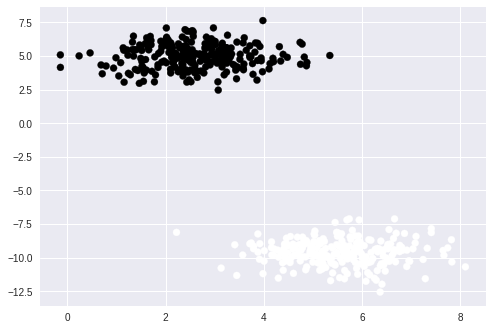

In [8]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()